In [126]:
import numpy as np
import scipy as sp
import os

In [127]:
target_round_1 = 10
target_round_2 = 10

In [128]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/deterministic_prob_test/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    kd_wt = 1 #* np.e #** 2
    ground_truth = ground_truth/kd_wt
    round_1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/sequence_effects.csv", delimiter=",")
    round_2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/sequence_effects.csv", delimiter=",")

    # get initial frequencies
    round_1_freqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/counts.csv", delimiter=",")
    round_2_freqs = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/counts.csv", delimiter=",")

    # get the selected frequencies
    round_1_selected = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/counts.csv", delimiter=",")
    round_2_selected = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/counts.csv", delimiter=",")

    return round_1, round_2, round_1_freqs, round_2_freqs, round_1_selected, round_2_selected   


In [115]:
round_1, round_2, round_1_freqs, round_2_freqs, round_1_selected, round_2_selected = get_pool_data(target_round_1, target_round_2)

In [116]:
print(round_1.shape, round_2.shape, round_1_freqs.shape, round_2_freqs.shape, round_1_selected.shape, round_2_selected.shape)

(1024,) (1024,) (1024,) (1024,) (1024,) (1024,)


In [117]:
B_round_1 = target_round_1 - np.sum(round_1_selected)
B_round_2 = target_round_2 - np.sum(round_2_selected)
print(B_round_1, B_round_2)

9.109656 9.903787


In [118]:
# K = (B/P_selected) - B
p_selected_round_1 = round_1_selected/round_1_freqs
p_selected_round_2 = round_2_selected/round_2_freqs

In [119]:
K_sequences_round_1 = (B_round_1/p_selected_round_1) - B_round_1
K_sequences_round_2 = (B_round_2/p_selected_round_2) - B_round_2

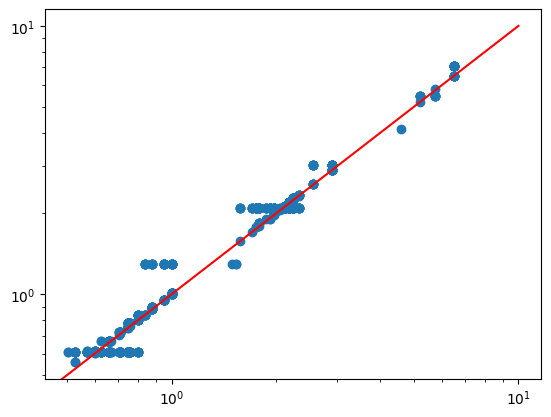

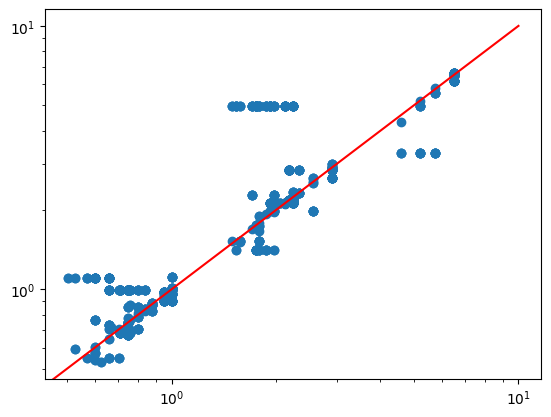

In [120]:
# plot round_1 vs K_sequences_round_1
import matplotlib.pyplot as plt
plt.scatter(round_1, K_sequences_round_1)
#add 1-to-1 line
plt.plot([0, 10], [0, 10], color='red')
#log scale both axes
plt.xscale('log')
plt.yscale('log')
plt.show()

# plot round_2 vs K_sequences_round_2
plt.scatter(round_2, K_sequences_round_2)
#add 1-to-1 line
plt.plot([0, 10], [0, 10], color='red')
#log scale both axes
plt.xscale('log')
plt.yscale('log')
plt.show()

In [121]:
# get indices where K_sequences_round_1 is not close to round_1
indices = np.where(np.abs(K_sequences_round_1 - round_1) > 0.1)
print(indices)

(array([  85,   86,   87,   89,   90,   91,   93,  101,  106,  107,  110,
        111,  117,  122,  123,  126,  127,  149,  150,  151,  153,  154,
        155,  157,  158,  159,  165,  166,  167,  173,  181,  182,  183,
        189,  213,  214,  215,  217,  218,  219,  221,  229,  234,  235,
        238,  239,  245,  250,  251,  254,  255,  277,  278,  279,  281,
        282,  283,  285,  293,  298,  299,  302,  303,  309,  314,  315,
        318,  319,  325,  326,  327,  329,  330,  331,  333,  334,  335,
        337,  338,  339,  340,  341,  342,  343,  344,  345,  346,  347,
        349,  350,  351,  354,  355,  357,  358,  359,  360,  361,  362,
        363,  364,  365,  366,  367,  370,  371,  373,  374,  375,  376,
        377,  378,  379,  380,  381,  382,  383,  390,  391,  394,  395,
        398,  399,  401,  402,  403,  404,  405,  406,  407,  408,  409,
        410,  411,  412,  413,  414,  415,  420,  421,  422,  423,  425,
        426,  427,  429,  430,  431,  436,  437,  

(array([243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 276.]),
 array([1.00e-06, 2.50e-06, 4.00e-06, 5.50e-06, 7.00e-06, 8.50e-06,
        1.00e-05, 1.15e-05, 1.30e-05, 1.45e-05, 1.60e-05]),
 <BarContainer object of 10 artists>)

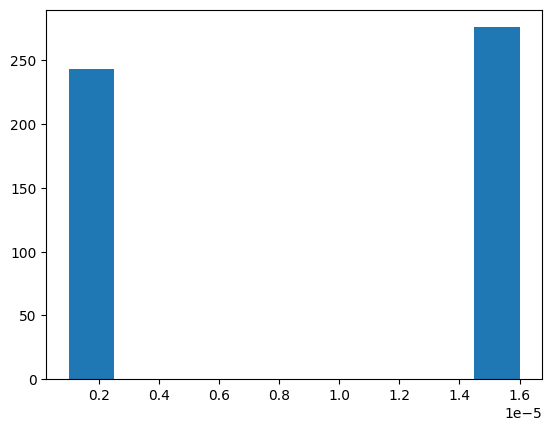

In [122]:
# plot histogram initial frequencies of sequences that are not close to K_sequences_round_1
plt.hist(round_1_freqs[indices])

(array([243.,   0.,   0.,   0.,   0.,  16.,  10.,  19.,  90., 141.]),
 array([1.00e-06, 2.40e-06, 3.80e-06, 5.20e-06, 6.60e-06, 8.00e-06,
        9.40e-06, 1.08e-05, 1.22e-05, 1.36e-05, 1.50e-05]),
 <BarContainer object of 10 artists>)

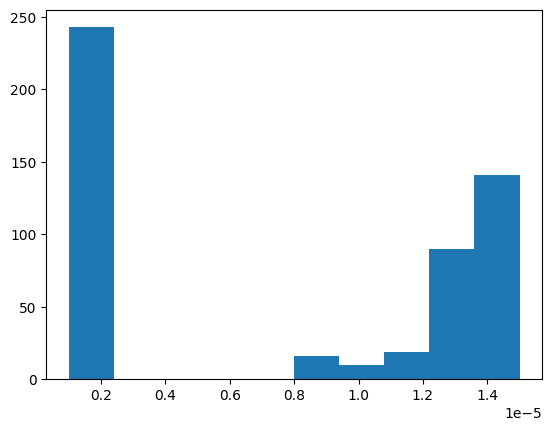

In [123]:
# plot histogram selected frequencies of sequences that are not close to K_sequences_round_1
plt.hist(round_1_selected[indices])

In [124]:
# get indices where initial frequencies are larger than 0.0001
indices = np.where(round_1_freqs > 0.001)

Value needs to be thresholded to remove sequences that have a very low initial frequencies. these sequences cannot be selected appropriately and there give wrong probability of binding! Threshold value is somewhat aritrary.

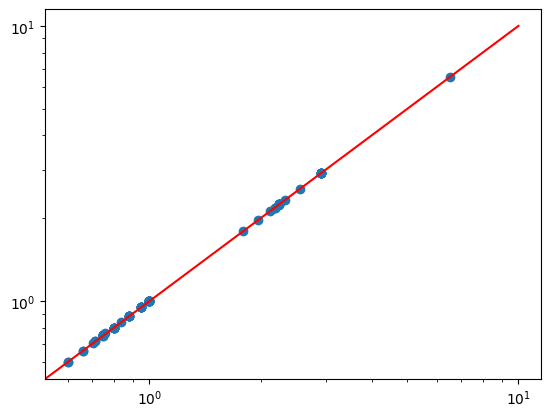

In [125]:
# plot k_sequences_round_1 vs round_1 for sequences with initial frequencies larger than 0.0001
plt.scatter(round_1[indices], K_sequences_round_1[indices])
#add 1-to-1 line
plt.plot([0, 10], [0, 10], color='red')
#log scale both axes
plt.xscale('log')
plt.yscale('log')
plt.show()